In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import h5py
import seaborn
import numpy as np
seaborn.set()

Positives: 23275
Positives: 22800


Text(0.5, 1.0, 'ROC Curve for Clean Images and Community Adversarial Attack')

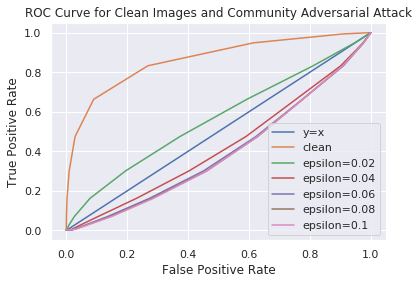

In [3]:
plt.plot(np.arange(0.0, 1.1, 0.1), np.arange(0.0, 1.1, 0.1), label="y=x")

with h5py.File("../results/roc_curve_test_preprocessed_sampled.txt", 'r') as f:
    tprs = f['tprs'][:]
    fprs = f['fprs'][:]
    print("Positives:", len(f['positive']))
    print("Positives:", len(f['negative']))
plt.plot(fprs, tprs, label="clean")
    

for epsilon in [0.02, 0.04, 0.06, 0.08, 0.1]:
    with h5py.File("../results/roc_curve_test_preprocessed_sampled_community_naive_same_epsilon_{}.txt".format(epsilon), 'r') as f:
        tprs = f['tprs'][:]
        fprs = f['fprs'][:]
    plt.plot(fprs, tprs, label="epsilon={}".format(epsilon))

plt.legend()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve for Clean Images and Community Adversarial Attack")

Positives: 31925134
Positives: 31798999


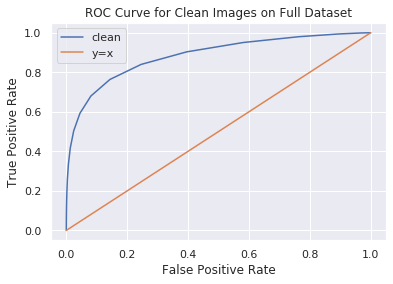

In [15]:
with h5py.File("../results/roc_curve_test_preprocessed.txt", 'r') as f:
    tprs = f['tprs'][:]
    fprs = f['fprs'][:]
    print("Positives:", len(f['positive']))
    print("Positives:", len(f['negative']))

plt.plot(fprs, tprs, label="clean")
plt.plot(np.arange(0.0, 1.1, 0.1), np.arange(0.0, 1.1, 0.1), label="y=x")

plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve for Clean Images on Full Dataset")
plt.legend()

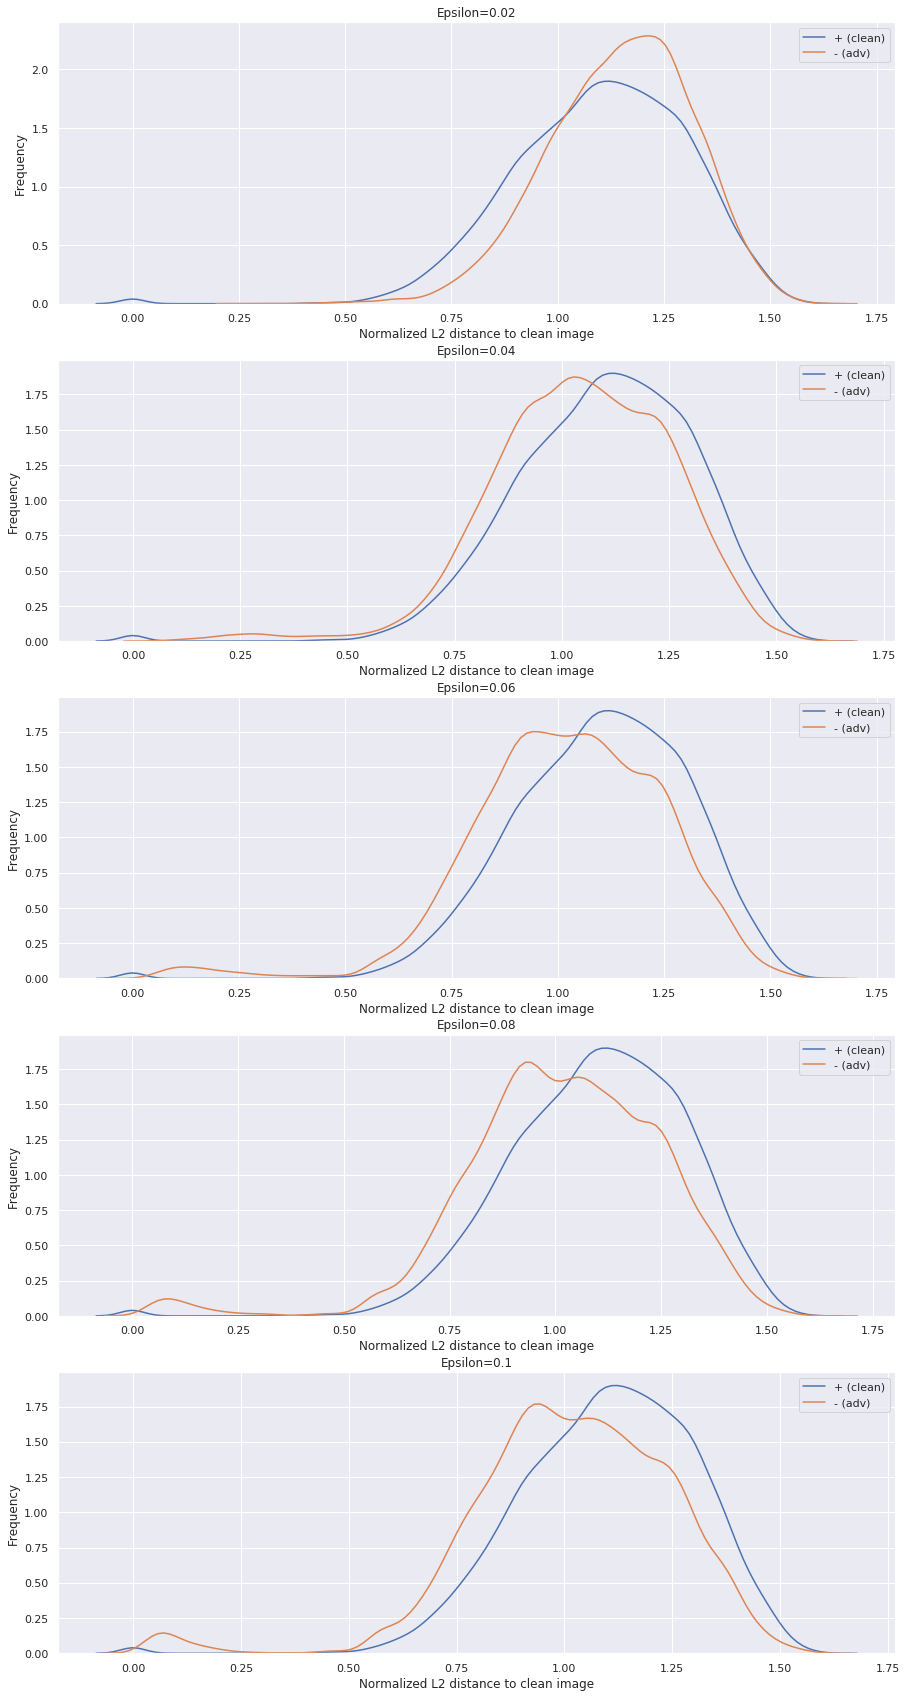

In [13]:
epsilons = [0.02, 0.04, 0.06, 0.08, 0.1]
fig, ax = plt.subplots(nrows=len(epsilons), ncols=1, figsize=(15, 30))

for indx, epsilon in enumerate(epsilons):
    with h5py.File(
        "../results/roc_curve_test_preprocessed_sampled_community_naive_same_epsilon_{}.txt".format(epsilon), 
        'r') as f:
        seaborn.distplot(
            f['positive'],
            kde=True,
            hist=False,
            label="+ (clean)",
            ax=ax[indx]
        )
        seaborn.distplot(
            f['negative'],
            kde=True,
            hist=False,
            label="- (adv)",
            ax=ax[indx]
        )
        ax[indx].set_xlabel("Normalized L2 distance to clean image")
        ax[indx].set_ylabel("Frequency")
        ax[indx].set_title("Epsilon={}".format(epsilon))